In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/amazon_alexa.tsv", delimiter="\t", quoting=3)
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
df[df["verified_reviews"].isna()]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [5]:
df["variation"].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [6]:
df["rating"].value_counts()

rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

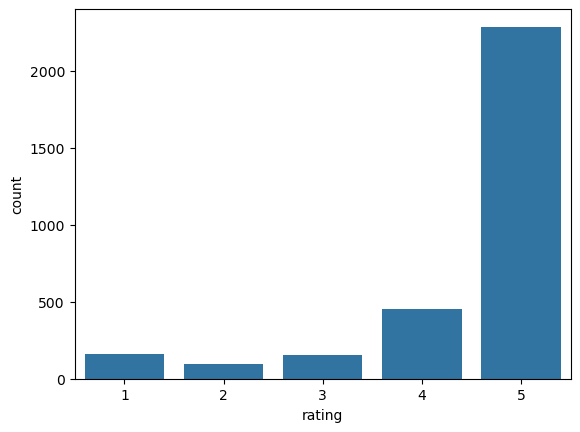

In [7]:
sns.barplot(df["rating"].value_counts())

In [8]:
df["feedback"].value_counts()

feedback
1    2893
0     257
Name: count, dtype: int64

In [9]:
df[df["feedback"] == 0].head(5).iloc[0]["verified_reviews"]

'"It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals."'

In [10]:
df[df["feedback"] == 1].head(5).iloc[0]["verified_reviews"]

'Love my Echo!'

0 means negative feedback and 1 means positive feedback

In [11]:
df[df["rating"] >= 3].shape

(2893, 5)

In [12]:
df[(df["rating"] >= 3)]["feedback"].unique()

array([1])

In [13]:
df[(df["rating"] < 3)]["feedback"].unique()

array([0])

ratings >= 3 are positive feedbacks and ratings < 3 are negative

<Axes: xlabel='feedback', ylabel='count'>

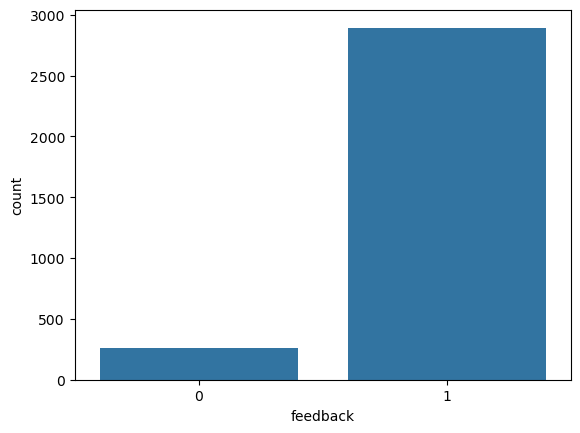

In [14]:
sns.barplot(df["feedback"].value_counts())

<Axes: ylabel='count'>

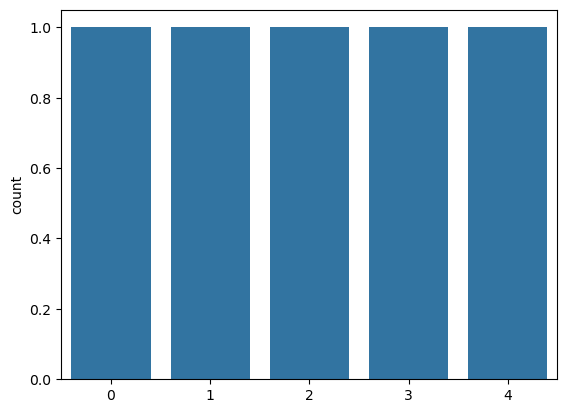

In [15]:
sns.countplot([0, 0, 1, 1, 1])

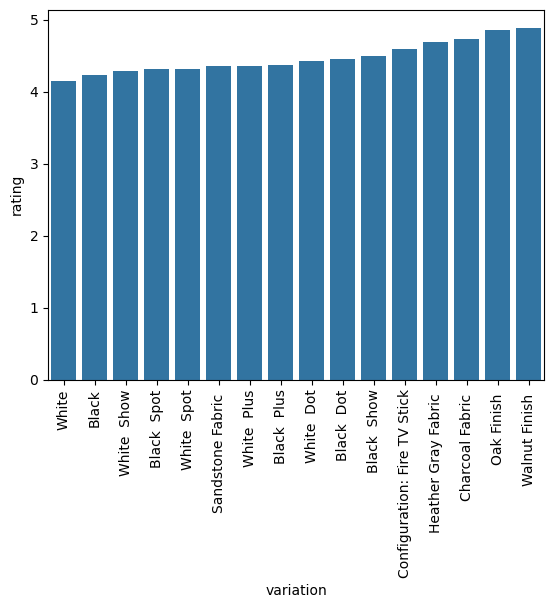

In [16]:
sns.barplot(df.groupby("variation")["rating"].mean().sort_values())
plt.xticks(rotation=90);

In [18]:
df["review_length"] = df["verified_reviews"].apply(lambda x: len(x) if x is not np.nan else 0)

<Axes: xlabel='rating', ylabel='review_length'>

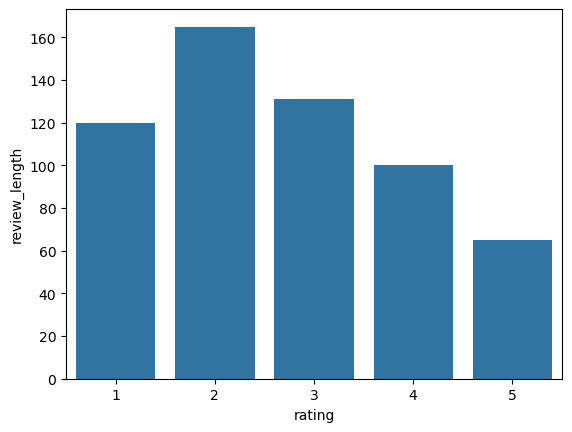

In [27]:
sns.barplot(df.groupby("rating")["review_length"].median())

In [ ]:
from wordcloud import WordCloud

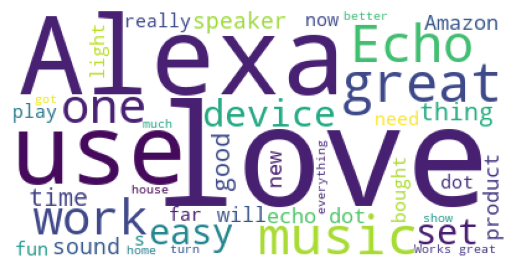

In [81]:
reviews = [review for review in df["verified_reviews"].fillna("")]

wc = WordCloud(max_words=40, background_color="white", random_state=42)
img = wc.generate(" ".join(reviews))
plt.imshow(img)
plt.axis(False);

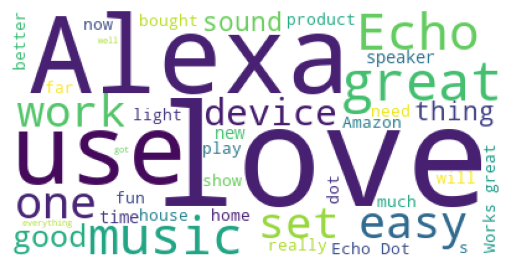

In [86]:
positive_reviews = [review for review in df[df["feedback"] == 1]["verified_reviews"].fillna("")]

wc = WordCloud(max_words=40, background_color="white", random_state=42)
img = wc.generate(" ".join(positive_reviews))
plt.imshow(img)
plt.axis(False);

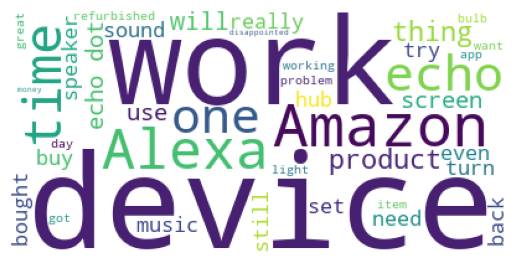

In [91]:
negative_reviews = [review for review in df[df["feedback"] == 0]["verified_reviews"].fillna("")]

wc = WordCloud(max_words=40, background_color="white", random_state=42)
img = wc.generate(" ".join(negative_reviews))
plt.imshow(img)
plt.axis(False);